In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
#/content/GroundingDINO/groundingdino/util inference.py
# transform = T.Compose(
#         [
#             # T.RandomResize([800], max_size=1333),
#             # Added T.Resize to fix the resized image during batch inference
#             T.Resize((800, 1200)),
#             T.ToTensor(),
#             T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
#         ]
#     )

#/content/GroundingDINO/groundingdino/datasets - transforms.py
# class Resize(object):
#     def __init__(self, size):
#         assert isinstance(size, (list, tuple))
#         self.size = size

#     def __call__(self, img, target=None):
#         return resize(img, target, self.size)

## Installing

In [5]:
#around 1 minute
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 23.5 MB/s eta 0:00:00


In [2]:
#config path
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Downloading weights

In [6]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
mkdir: cannot create directory ‘/content/weights’: File exists
/content/weights


In [3]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

In [7]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Grounding DINO Model

In [4]:
%cd {HOME}/GroundingDINO

/content/GroundingDINO


In [5]:
from groundingdino.util.inference import load_model, load_image, predict, annotate, preprocess_caption
from groundingdino.util.utils import get_phrases_from_posmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import supervision as sv
import torch
from tqdm import tqdm
import glob
from PIL import Image
%matplotlib inline


model = load_model(CONFIG_PATH, WEIGHTS_PATH)

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


## Grounding DINO Demo

In [6]:
IMAGE_NAME = "паспорт+лицо.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "man"
# BOX_TRESHOLD = 0.01
# TEXT_TRESHOLD = 0.01

BOX_TRESHOLD = 0.2
TEXT_TRESHOLD = 0.25

In [7]:
def inference_images(images, model, TEXT_PROMPT, BOX_TRESHOLD, TEXT_TRESHOLD):

  res = {}

  for image in tqdm(images):
    image_source, image = load_image(IMAGE_PATH)

    boxes, logits, phrases = predict(
        model=model,
        image=image,
        caption=TEXT_PROMPT,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    res[image] = {
        'boxes' : boxes,
        'logits' : logits,
        'phrases' : phrases
    }

    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

  return res, annotated_frame

In [32]:
if False:
  sv.plot_image(annotated_frame, (16, 16))

In [17]:
results = inference_images(
    glob.glob('/content/data/*'),
    model,
    TEXT_PROMPT,
    BOX_TRESHOLD,
    TEXT_TRESHOLD
)

100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


In [18]:
results

({tensor([[[ 2.1975,  2.0605,  1.9407,  ...,  2.0092,  1.9920,  2.0092],
           [ 2.0777,  2.0263,  1.9920,  ...,  2.0092,  2.0434,  2.1119],
           [ 1.9407,  1.9920,  2.0434,  ...,  2.0092,  2.0777,  2.1633],
           ...,
           [ 0.7933,  0.7419,  0.7248,  ..., -0.2171,  0.1768,  0.2453],
           [ 0.7419,  0.6563,  0.6049,  ..., -0.0801,  0.0227,  0.1939],
           [ 0.8276,  0.6563,  0.5193,  ..., -0.1143, -0.3198, -0.0801]],
  
          [[ 1.5182,  1.3782,  1.2556,  ...,  1.1681,  1.1506,  1.1681],
           [ 1.3957,  1.3431,  1.3081,  ...,  1.1681,  1.2031,  1.2731],
           [ 1.2556,  1.3081,  1.3606,  ...,  1.1681,  1.2381,  1.3256],
           ...,
           [ 0.4503,  0.3978,  0.3627,  ...,  0.3102,  0.7129,  0.7829],
           [ 0.3978,  0.3102,  0.2402,  ...,  0.4503,  0.5553,  0.7304],
           [ 0.4853,  0.3102,  0.1527,  ...,  0.4153,  0.2052,  0.4503]],
  
          [[ 0.5834,  0.4439,  0.3219,  ...,  0.2871,  0.2696,  0.2871],
           

## 2-ая версия, работает хуже

In [15]:
def predict_batch(
        model,
        images: torch.Tensor,
        caption: str,
        box_threshold: float,
        text_threshold: float,
        device: str = "cuda"
) :
    caption = preprocess_caption(caption=caption)

    model = model.to(device)
    image = images.to(device)

    print(f"Image shape: {image.shape}")
    with torch.no_grad():
        outputs = model(image, captions=[caption for _ in range(len(images))])

    print(f'{outputs["pred_logits"].shape}')
    print(f'{outputs["pred_boxes"].shape}')
    prediction_logits = outputs["pred_logits"].cpu().sigmoid()[0]  # prediction_logits.shape = (nq, 256)
    prediction_boxes = outputs["pred_boxes"].cpu()[0]  # prediction_boxes.shape = (nq, 4)

    mask = prediction_logits.max(dim=1)[0] > box_threshold
    logits = prediction_logits[mask]  # logits.shape = (n, 256)
    boxes = prediction_boxes[mask]  # boxes.shape = (n, 4)

    print(boxes)

    tokenizer = model.tokenizer
    tokenized = tokenizer(caption)

    phrases = [
        get_phrases_from_posmap(logit > text_threshold, tokenized, tokenizer).replace('.', '')
        for logit
        in logits
    ]

    return boxes, logits.max(dim=1)[0], phrases

In [13]:
images_paths = glob.glob('/content/data/*')
images = torch.stack([load_image(img)[1] for img in images_paths])

In [16]:
boxes, logits, phrases = predict_batch(
    model=model,
    images=images,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

Image shape: torch.Size([5, 3, 1200, 800])


torch.Size([5, 900, 256])
torch.Size([5, 900, 4])
tensor([[0.3685, 0.4927, 0.6829, 0.4500],
        [0.6011, 0.4857, 0.2014, 0.1960],
        [0.4652, 0.5296, 0.8753, 0.5246]])


In [11]:
phrases

['man', '', 'man']

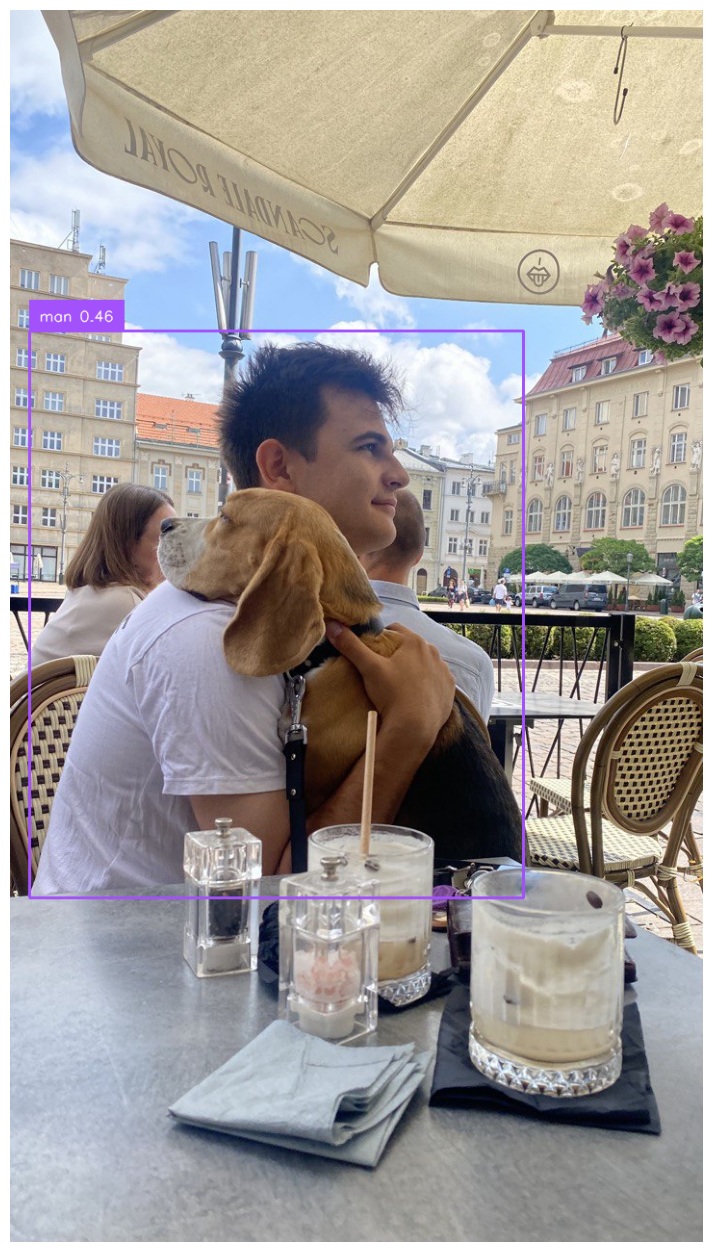

In [56]:
annotated_frame = annotate(image_source=load_image(images_paths[0])[0], boxes=boxes[0][None, :], logits=[logits[0]], phrases=[phrases[0]])
if True:
  sv.plot_image(annotated_frame, (16, 16))